C:\Anaconda\lib\site-packages\sklearn\cluster\mean_shift_.py:226: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  unique = np.ones(len(sorted_centers), dtype=np.bool)
C:\Anaconda\lib\site-packages\sklearn\cluster\mean_shift_.py:239: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org

Estimated number of clusters: 7
Cluster 0 center coordinates: [54.81818182 49.88311688]
Cluster 1 center coordinates: [77.88888889 83.37037037]
Cluster 2 center coordinates: [80.18181818 12.68181818]
Cluster 3 center coordinates: [25.58823529 74.76470588]
Cluster 4 center coordinates: [28.8        24.93333333]
Cluster 5 center coordinates: [127.66666667  78.66666667]
Cluster 6 center coordinates: [127.66666667  20.66666667]


No handles with labels found to put in legend.


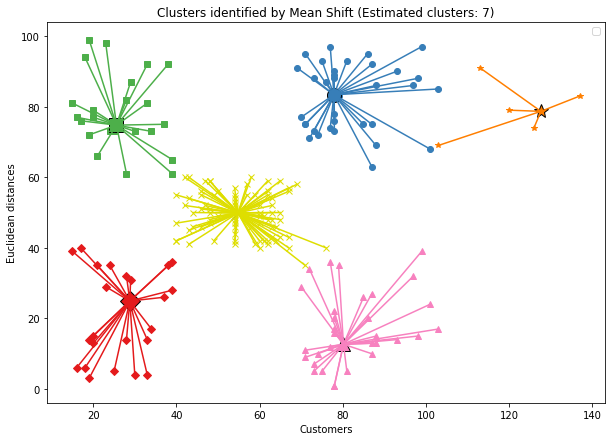

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import MeanShift, estimate_bandwidth
from itertools import cycle


dataset = pd.read_csv('Mall_Customers.csv')


X = dataset.iloc[:, [3, 4]].values


bandwidth = estimate_bandwidth(X, quantile=0.1, n_samples=500)


mean_shift = MeanShift(bandwidth=bandwidth)
y_ms = mean_shift.fit_predict(X)
cluster_centers = mean_shift.cluster_centers_
labels = mean_shift.labels_


n_clusters_ = len(np.unique(labels))
print(f"Estimated number of clusters: {n_clusters_}")


for k in range(n_clusters_):
    print(f"Cluster {k} center coordinates: {cluster_centers[k]}")


plt.figure(figsize=(10, 7))
plt.clf()

colors = ["#dede00", "#377eb8", "#f781bf", "#4daf4a", "#e41a1c", "#ff7f00"]
markers = ["x", "o", "^", "s", "D", "*"]

for k, col, marker in zip(range(n_clusters_), colors, markers):
    class_members = labels == k
    cluster_center = cluster_centers[k]
    
    plt.plot(X[class_members, 0], X[class_members, 1], marker, color=col, linestyle='None')
    plt.plot(cluster_center[0], cluster_center[1], marker, markerfacecolor=col, 
             markeredgecolor='k', markersize=14)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title(f'Clusters identified by Mean Shift (Estimated clusters: {n_clusters_})')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.legend()
plt.savefig('mean_shift_clusters.png')
plt.show()

